In [1]:
import h2o
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)
  Starting server from C:\Users\minet\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\minet\AppData\Local\Temp\tmpd1wcvjqx
  JVM stdout: C:\Users\minet\AppData\Local\Temp\tmpd1wcvjqx\h2o_Paul_started_from_python.out
  JVM stderr: C:\Users\minet\AppData\Local\Temp\tmpd1wcvjqx\h2o_Paul_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_Paul_chj76n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.547 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
x = [z*0.01 for z in range(0, 1001)]

In [4]:
print( x[0:5])
print( x[995:1001])

[0.0, 0.01, 0.02, 0.03, 0.04]
[9.950000000000001, 9.96, 9.97, 9.98, 9.99, 10.0]


In [5]:
y = np.sin(x)
y = y + np.random.normal(0, 0.1, len(x))

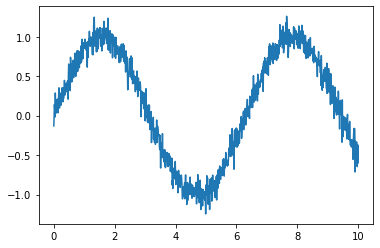

In [6]:
plt.plot(x, y)
plt.show()

In [7]:
sine_wave = pd.DataFrame({
    'a':x,
    'b':y
})

In [8]:
#Turn it into an h20 data frame
sine_wave_h2o = h2o.H2OFrame(
    sine_wave
    )

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
sine_wave_h2o.summary()

,a,b
type,real,real
mins,0.0,-1.2453014536820477
mean,4.999999999999934,0.1793468998623978
maxs,10.0,1.2595018960723916
sigma,2.891081112663593,0.6736107835872936
zeros,1,0
missing,0,0
0,0.0,-0.13018511559510057
1,0.01,-0.01988378592406425
2,0.02,0.14040554044633022


In [10]:
#Turn it into an h20 data frame
sine_wave_h2o = h2o.H2OFrame(
    sine_wave,
    destination_frame = "sine_wave"
    )

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
#This will turn it into a pandas df
sine_wave_h2o.as_data_frame()

,a,b
0,0.00,-0.130185
1,0.01,-0.019884
2,0.02,0.140406
3,0.03,0.086616
4,0.04,-0.017297
...,...,...
996,9.96,-0.535446
997,9.97,-0.646004
998,9.98,-0.470058
999,9.99,-0.372049
